## Вітаю вас на Mid-term проєкті!

Цей проєкт призначений для того, щоб ви могли оновити та закріпити знання, які ви отримали за перші місяці навчання на курсі "Machine Learning для людей".

### Основна задача

В цьому завданні Ви - Data Scientist в барнку. Ваша задача - побудувати модель для передбачення, чи оформить клієнт в банку строковий депозит (term deposit). З подібними задачами ми стикаємось в різних компаніях і доменах, коли хочемо зрозуміти, чи клієнт купить якийсь продукт, чи буде користуватись нашим сервісом/сайтом у наступному місяці, чи придбає підписку.

Вам треба не просто побудувати модель, а і пояснити замовнику (ваш замовник тут - це ми з кураторами) як працює ця модель і чому вона дає саме такі рішення. Без цього розуміння ми не можемо перейти до впроваждення (деплойменту) моделі в продакшен.

### Практичне застовування

В реальних робочих умовах в подібних задачах у Вас дані будуть зберігатись в базі данних в динаміці (різні дії користувачів з датою і часом). Тут дані вже загреговані по клієнтам і часто саме з цього ви будете починати побудову моделі передбачення, адже це відносно просто і зручно: загрегувати дані по клієнтам до певного часу і передбачати в майбутнє (тільки в випадку тренування моделі ML наше "майбутнє" теж фактично в минулому - бо ми хочемо мати мітки в даних, а от вже при використанні моделі в продакшені і бойових умовах ви справді будете робити передбачення в майбутнє). Тож, розвʼязуємо задачку!

### Датасет і ML задача

Для виконання завдання ми використаємо набір даних, який оригінально походить з сайту [UCI Machine Learning Repository], але там неточний опис даних і багато різних піднаборів, тому ми братимемо з Kaggle dataset: https://www.kaggle.com/datasets/sahistapatel96/bankadditionalfullcsv.

Ці дані стосуються прямих маркетингових кампаній (телефонних дзвінків) португальської банківської установи. Кінцева мета класифікації - передбачити, чи підпише клієнт строковий депозит (змінна y).

Ми будемо працювати з файлом `bank-additional-full.csv`, скачати набір даних треба з Kaggle. Або можна скачати цей самий набір з гугл диска [тут](https://drive.google.com/file/d/1pDr0hAOnu1JsEiJeBu_F2Jv0GPxKiujW/view?usp=drive_link)

### Опис змінних

Цей опис є і на Kaggle, але ми переклали для вашої зручності і аби він був у вас перед очима під час роботи над проєктом.

#### **Дані про клієнта банку**:
1. **age** – вік клієнта (числова змінна).  
2. **job** – вид зайнятості (категоріальна змінна: `admin.`, `blue-collar`, `entrepreneur`, `housemaid`, `management`, `retired`, `self-employed`, `services`, `student`, `technician`, `unemployed`, `unknown`).  
3. **marital** – сімейний стан (категоріальна змінна: `divorced`, `married`, `single`, `unknown`; примітка: `divorced` означає розлучений або вдівець/вдова).  
4. **education** – рівень освіти (категоріальна змінна: `basic.4y`, `basic.6y`, `basic.9y`, `high.school`, `illiterate`, `professional.course`, `university.degree`, `unknown`).  
5. **default** – чи є у клієнта прострочений кредит? (категоріальна змінна: `no`, `yes`, `unknown`).  
6. **housing** – чи має клієнт іпотечний кредит? (категоріальна змінна: `no`, `yes`, `unknown`).  
7. **loan** – чи має клієнт споживчий кредит? (категоріальна змінна: `no`, `yes`, `unknown`).  

#### **Дані про останній контакт у межах поточної маркетингової кампанії**:
8. **contact** – тип зв’язку при останньому контакті (категоріальна змінна: `cellular`, `telephone`).  
9. **month** – місяць останнього контакту (категоріальна змінна: `jan`, `feb`, `mar`, …, `nov`, `dec`).  
10. **day_of_week** – день тижня останнього контакту (категоріальна змінна: `mon`, `tue`, `wed`, `thu`, `fri`).  
11. **duration** – тривалість останнього контакту в секундах (числова змінна).  
   ⚠ **Важлива примітка**: ця змінна має суттєвий вплив на цільову змінну (наприклад, якщо duration = 0, то y = `no`). Однак значення duration невідоме до здійснення дзвінка. Крім того, після завершення дзвінка значення y вже відоме. Тому цю змінну варто використовувати лише для порівняння моделей, але не включати у фінальну передбачувальну модель.  

#### **Інші атрибути**:
12. **campaign** – кількість контактів у межах поточної кампанії для цього клієнта (числова змінна, включає останній контакт).  
13. **pdays** – кількість днів, що минули з моменту останнього контакту клієнта у попередній кампанії (числова змінна; значення 999 означає, що клієнт раніше не контактувався).  
14. **previous** – кількість контактів, здійснених до цієї кампанії для цього клієнта (числова змінна).  
15. **poutcome** – результат попередньої маркетингової кампанії (категоріальна змінна: `failure`, `nonexistent`, `success`).  

#### **Атрибути соціально-економічного контексту**:
16. **emp.var.rate** – темп зміни зайнятості (щоквартальний показник, числова змінна).  
17. **cons.price.idx** – індекс споживчих цін (щомісячний показник, числова змінна).  
18. **cons.conf.idx** – індекс довіри споживачів (щомісячний показник, числова змінна).  
19. **euribor3m** – ставка Euribor на 3 місяці (щоденний показник, числова змінна).  
20. **nr.employed** – кількість працевлаштованих осіб (щоквартальний показник, числова змінна).  

#### **Цільова змінна**:
21. **y** – чи підписав клієнт строковий депозит? (бінарна змінна: `yes`, `no`).

### Ваше завдання на цей проєкт

Необхідно побудувати рішення цієї задачі бінарної класифікації. Для цього

1. Провести Exploratory Data Analysis і висунути гіпотези щодо впливу окремих ознак на цільову ознаку `y`.

2. Описати, які методи ви вважаєте доречним використовувати і обрати метрику оцінки якості моделей (метрику треба обґрунтувати).

3. Провести препроцесинг даних для подальшої їх передачі в модель. Препроцесинг має включати
  - обробку категоріальних змінних (якщо цього потребує модель)
  - групування категорій в категоріальних змінних, якщо потрібно
  - заповнення пропущених значень, якщо такі є
  - виявлення outliers і прийняття рішень, що з ними робити
  - створення додаткових ознак, які на ваш погляд поліпшать якість моделей ML.

4. Натренувати 4 різні типи моделей машинного навчання, з яких обовʼязково
  - Logistic Regression
  - kNN
  - Decision Tree
  - Принаймні один з алгоритмів бустингу

5. Створити таблицю з порівнянням якості моделей (в Google Spreadsheets або прямо в Jupyter Notebook), де зазначити
  - назву моделі
  - гіперпараметри
  - метрика якості моделі на тренувальному наборі
  - метрика якості моделі на валідаційному наборі даних
  - коментар до моделі - хороша вона, чи ні, чи варто її використовувати чи ні, чи є у вас подальші ідеї щодо експериментів з цією моделлю?

6. Для алгоритму бустингу виконати процедуру тюнингу гіперпараметрів двома способами
  - Sklearn: Randomized Search
  - Hyperopt: Bayesian Optimization.
  Виявити оптимальні гіперпараметри і зробити висновки про якість моделі в кожному з випадків.

7. Вивести важливість ознак для моделі, які показала себе найкраще і описати, чи вважаєте ви саме такий пріоритет важливості ознак адекватним з точки зору common sense?

8. Для найкращої провести аналіз впливу ознак на передбачення з допомогою бібліотеки SHAP.

9. Провести аналіз записів, в яких модель помиляється і на основі нього зазначити, яким чином можна поліпшити наявне рішення аби уникати наявних помилок?


### Результат виконання проєкту

Результатом виконання цього завдання є окремий github репозиторій з охайно оформленим Jupyter Notebook, частина коду може бути винесена в .py файли. Репозиторій має містити опис задачі, опис що було зроблено і які моделі використано, таблицю результатів експериментів (можна скріншотом або створити таблицю в Markdown форматі - див. Приклад) і висновки, що Ви досягли і що можна було б ще зробити для поліпшення результатів.


### Приклад проєкту

Для натхнення ви можете ознайомитись з проєктом, побудованим на основі цих даних за [цим посиланням](https://github.com/surtantheta/Bank_Marketing_Dataset_Machine_Learning_Project).




![](https://blogconcept2competence.wordpress.com/wp-content/uploads/2014/03/yoda.jpg)

In [2]:
%load_ext autoreload
%autoreload 2

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
import warnings
import viz_plots as vp

pd.set_option('display.max.columns',130)
pd.set_option('float_format', '{:.2f}'.format)

In [4]:
data = pd.read_csv('bank-additional-full.csv', sep=';')
data.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,261,1,999,0,nonexistent,1.10,93.99,-36.40,4.86,5191.00,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,149,1,999,0,nonexistent,1.10,93.99,-36.40,4.86,5191.00,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,226,1,999,0,nonexistent,1.10,93.99,-36.40,4.86,5191.00,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,151,1,999,0,nonexistent,1.10,93.99,-36.40,4.86,5191.00,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,307,1,999,0,nonexistent,1.10,93.99,-36.40,4.86,5191.00,no


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  object 
 2   marital         41188 non-null  object 
 3   education       41188 non-null  object 
 4   default         41188 non-null  object 
 5   housing         41188 non-null  object 
 6   loan            41188 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  duration        41188 non-null  int64  
 11  campaign        41188 non-null  int64  
 12  pdays           41188 non-null  int64  
 13  previous        41188 non-null  int64  
 14  poutcome        41188 non-null  object 
 15  emp.var.rate    41188 non-null  float64
 16  cons.price.idx  41188 non-null  float64
 17  cons.conf.idx   41188 non-null 

# Numerical dat

In [6]:
data['target'] = data['y'].apply(lambda x: 1 if x == 'yes' else 0)  
target_data = data['target']

input_data = data.drop('y', axis=1)
input_data = input_data.drop('target', axis=1)

num_cols = list(data.select_dtypes(include=['int64', 'float64']).columns)
cat_cols = list(data.select_dtypes(include=['object']).columns)
print('Categorical columns:', cat_cols, '\nNumerical columns:', num_cols) 

Categorical columns: ['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month', 'day_of_week', 'poutcome', 'y'] 
Numerical columns: ['age', 'duration', 'campaign', 'pdays', 'previous', 'emp.var.rate', 'cons.price.idx', 'cons.conf.idx', 'euribor3m', 'nr.employed', 'target']


In [7]:
data1 = data[data['target'] == 1]
data0 = data[data['target'] == 0]

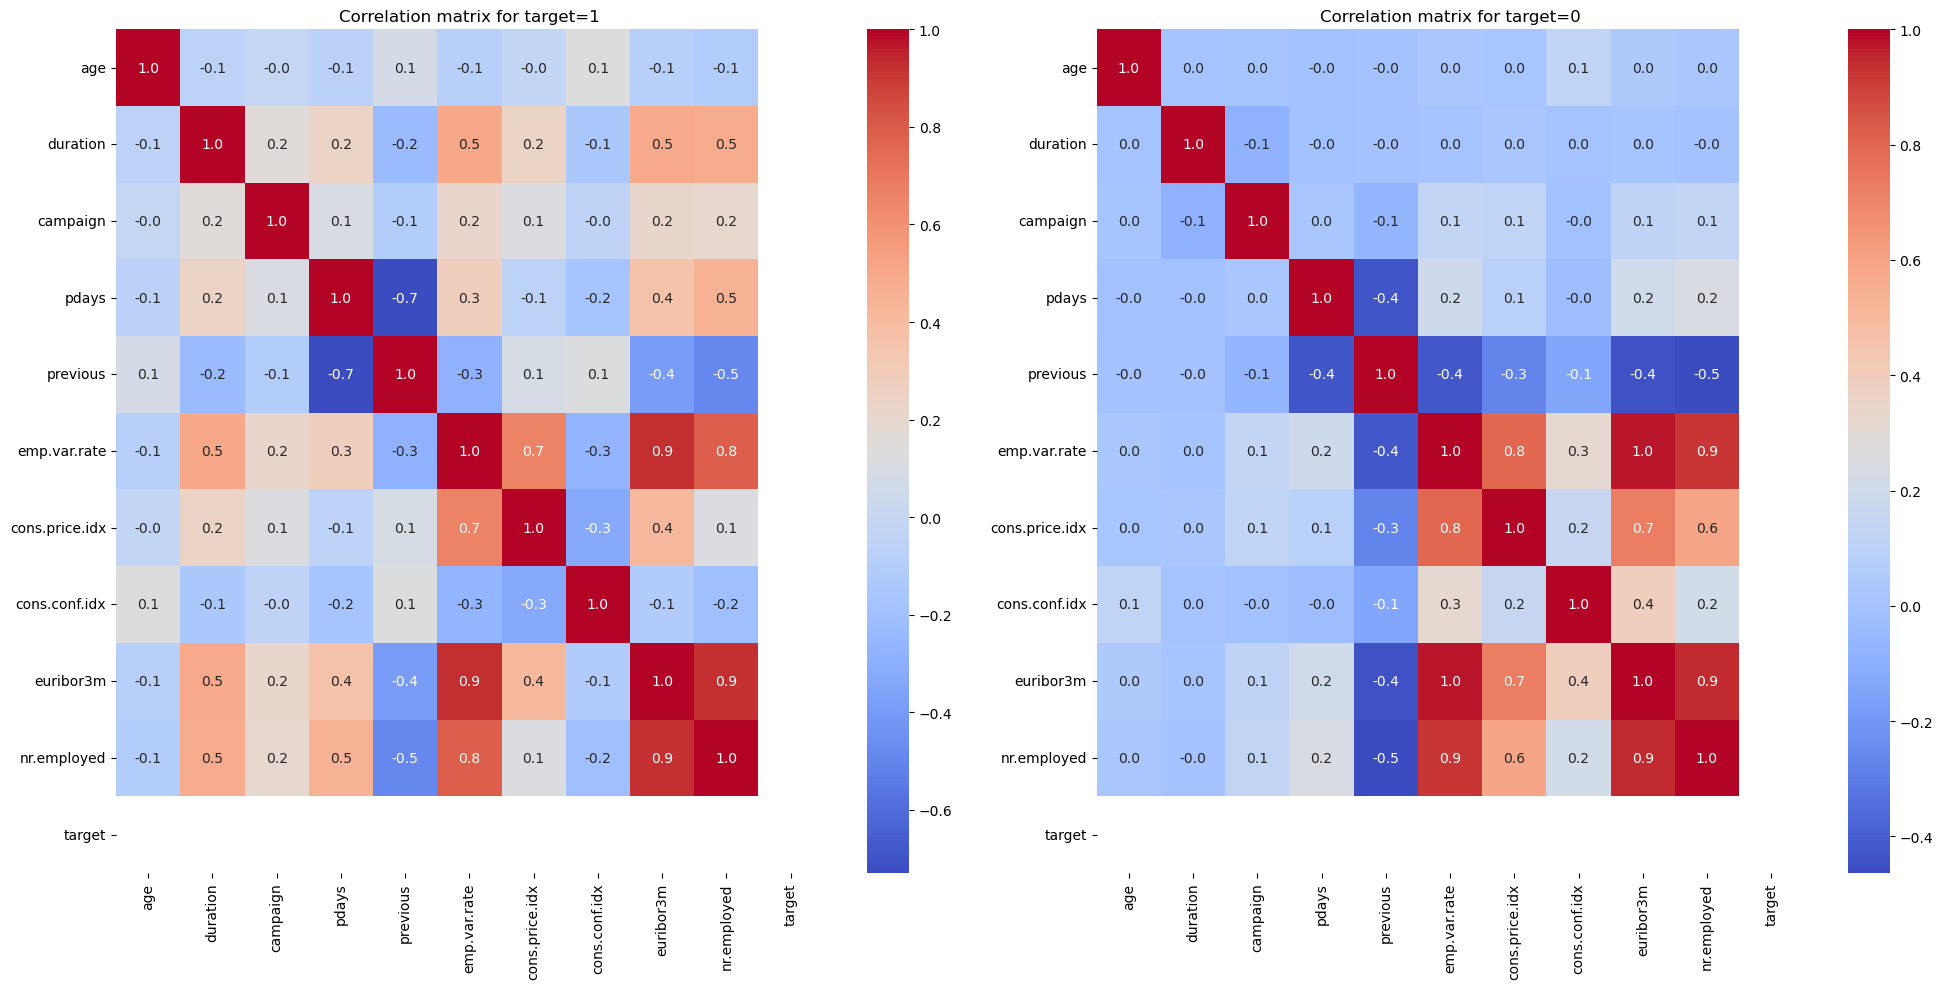

In [8]:
corr1 = data1[num_cols].corr()
corr0 = data0[num_cols].corr()

plt.figure(figsize=(20, 10))

plt.subplot(1, 2, 1)
sns.heatmap(corr1, annot=True, cmap='coolwarm', fmt='.1f')
plt.title('Correlation matrix for target=1')

plt.subplot(1, 2, 2)
sns.heatmap(corr0, annot=True, cmap='coolwarm', fmt='.1f')
plt.title('Correlation matrix for target=0')

plt.tight_layout()
plt.show()


<Axes: >

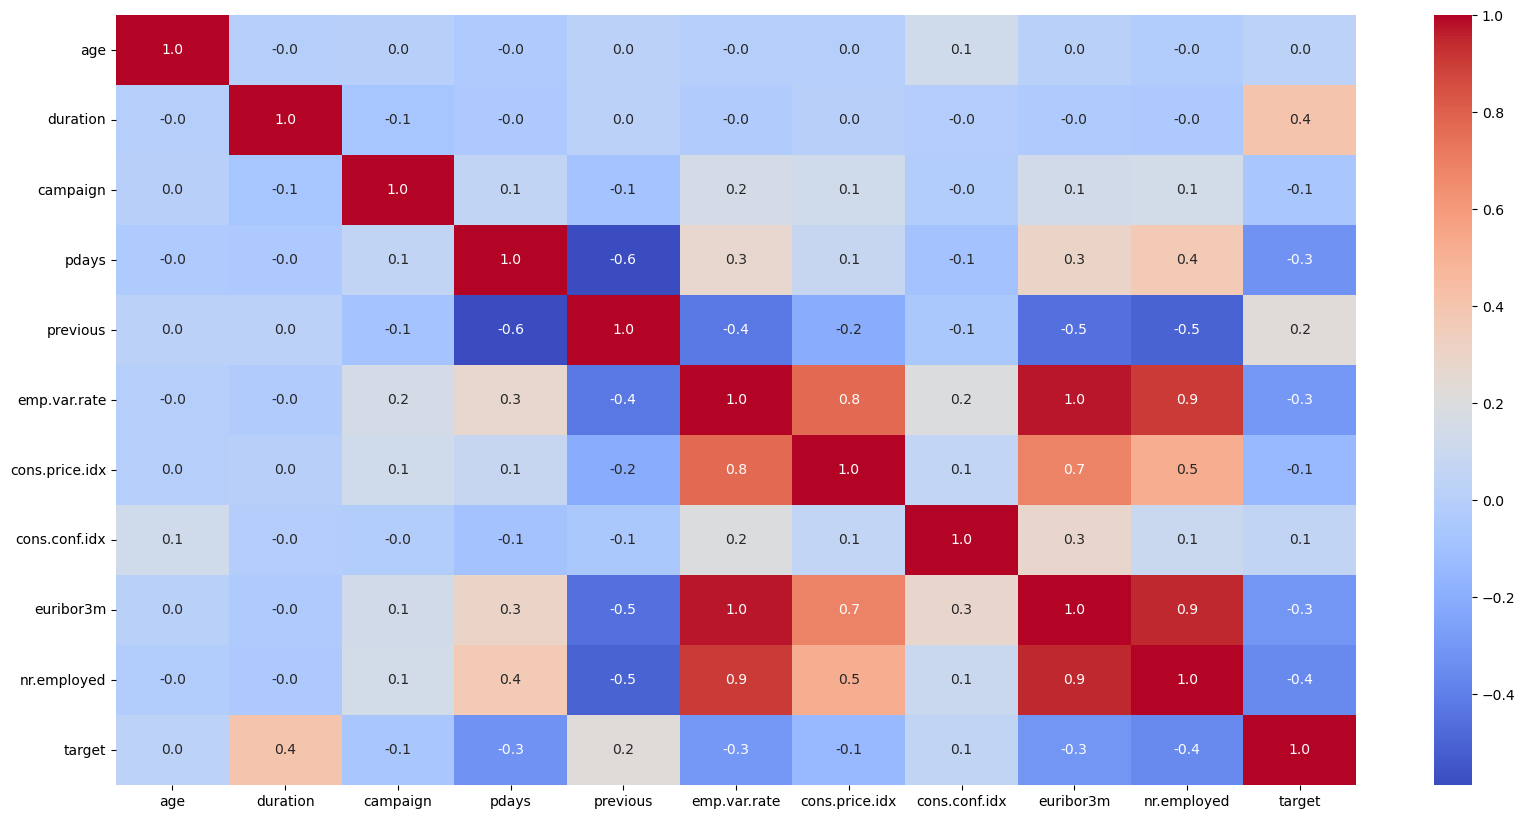

In [9]:
corr = data[num_cols].corr()
plt.figure(figsize=(20, 10))
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt='.1f')

In [10]:
data_num_stat = pd.DataFrame([data[num_cols].mean(), data[num_cols].min(), data[num_cols].max()], index=['mean',  'min', 'max'])

data.describe()

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,target
count,41188.00,41188.00,41188.00,41188.00,41188.00,41188.00,41188.00,41188.00,41188.00,41188.00,41188.00
mean,40.02,258.29,2.57,962.48,0.17,0.08,93.58,-40.50,3.62,5167.04,0.11
std,10.42,259.28,2.77,186.91,0.49,1.57,0.58,4.63,1.73,72.25,0.32
min,17.00,0.00,1.00,0.00,0.00,-3.40,92.20,-50.80,0.63,4963.60,0.00
25%,32.00,102.00,1.00,999.00,0.00,-1.80,93.08,-42.70,1.34,5099.10,0.00
50%,38.00,180.00,2.00,999.00,0.00,1.10,93.75,-41.80,4.86,5191.00,0.00
75%,47.00,319.00,3.00,999.00,0.00,1.40,93.99,-36.40,4.96,5228.10,0.00
max,98.00,4918.00,56.00,999.00,7.00,1.40,94.77,-26.90,5.04,5228.10,1.00


In [11]:
outliers = {}
for col in num_cols:
    outlier = vp.outlier_range(data, col)
    outliers[col] = outlier
    
outliers_df = pd.DataFrame([outliers], index=['outlier'])    

Максимальне значення, після якого існують викиди для age: 69.5
Максимальне значення, після якого існують викиди для duration: 644.5
Максимальне значення, після якого існують викиди для campaign: 6.0
Максимальне значення, після якого існують викиди для pdays: 999.0
Максимальне значення, після якого існують викиди для previous: 0.0
Максимальне значення, після якого існують викиди для emp.var.rate: 6.200000000000001
Максимальне значення, після якого існують викиди для cons.price.idx: 95.3725
Максимальне значення, після якого існують викиди для cons.conf.idx: -26.949999999999992
Максимальне значення, після якого існують викиди для euribor3m: 10.3865
Максимальне значення, після якого існують викиди для nr.employed: 5421.6
Максимальне значення, після якого існують викиди для target: 0.0


In [12]:
data_num_stat = pd.concat([data_num_stat, outliers_df], axis=0)
data_num_stat

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,target
mean,40.02,258.29,2.57,962.48,0.17,0.08,93.58,-40.50,3.62,5167.04,0.11
min,17.00,0.00,1.00,0.00,0.00,-3.40,92.20,-50.80,0.63,4963.60,0.00
max,98.00,4918.00,56.00,999.00,7.00,1.40,94.77,-26.90,5.04,5228.10,1.00
outlier,69.50,644.50,6.00,999.00,0.00,6.20,95.37,-26.95,10.39,5421.60,0.00


In [13]:
data['campaign'].describe( percentiles =[0.75, 0.9, 0.99, 0.999, 0.9999])

count    41188.00
mean         2.57
std          2.77
min          1.00
50%          2.00
75%          3.00
90%          5.00
99%         14.00
99.9%       29.00
99.99%      41.88
max         56.00
Name: campaign, dtype: float64

In [14]:
percentile_0999 = data['campaign'].quantile(0.9999)
cont = data[data['campaign'] > percentile_0999]
print( 'Number of records with duration less than 99.99 percentile:', cont.shape[0], 'percent:', percentile_0999)

Number of records with duration less than 99.99 percentile: 5 percent: 41.881299999993644


<Figure size 2000x1000 with 0 Axes>

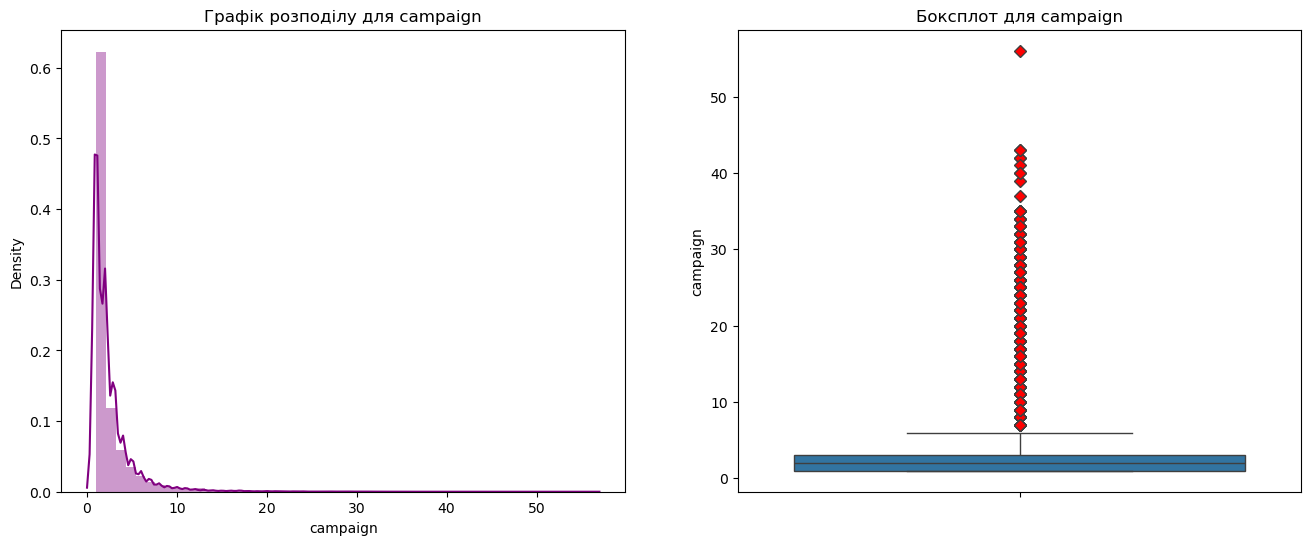

In [15]:
plt.figure(figsize=(20, 10))
vp.dist_box(data,'campaign')

In [16]:
data['previous'].value_counts()

previous
0    35563
1     4561
2      754
3      216
4       70
5       18
6        5
7        1
Name: count, dtype: int64

In [17]:
# data.pdays.value_counts(ascending=True)

In [18]:
data['cons.conf.idx'].describe( percentiles =[0.75, 0.9, 0.99, 0.999, 0.9999])

count    41188.00
mean       -40.50
std          4.63
min        -50.80
50%        -41.80
75%        -36.40
90%        -36.10
99%        -26.90
99.9%      -26.90
99.99%     -26.90
max        -26.90
Name: cons.conf.idx, dtype: float64

In [19]:
data[data['cons.conf.idx'] == -26.90].shape[0]

447

In [20]:
percentile_0999 = data['cons.conf.idx'].quantile(0.999)
cont = data[data['cons.conf.idx'] > percentile_0999]
print( 'Number of records with duration less than 99.99 percentile:', cont.shape[0], 'percent:', percentile_0999)
print(f'Target distribution: {data[data['cons.conf.idx'] > percentile_0999].target.value_counts()}') 

Number of records with duration less than 99.99 percentile: 0 percent: -26.9
Target distribution: Series([], Name: count, dtype: int64)


<Figure size 2000x1000 with 0 Axes>

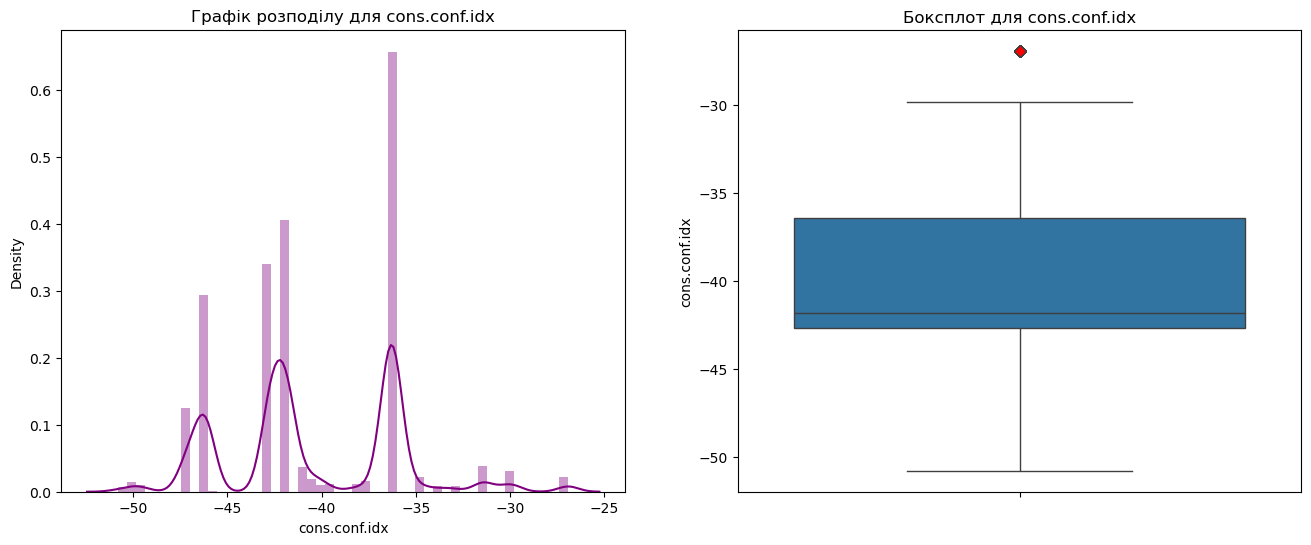

In [21]:
plt.figure(figsize=(20, 10))
vp.dist_box(data,'cons.conf.idx')

In [22]:
data.duration.describe( percentiles =[0.75, 0.9, 0.99, 0.999, 0.9999])

count    41188.00
mean       258.29
std        259.28
min          0.00
50%        180.00
75%        319.00
90%        551.00
99%       1271.13
99.9%     2175.59
99.99%    3616.52
max       4918.00
Name: duration, dtype: float64

In [23]:
percentile_0999 = data.duration.quantile(0.999)
cont = data[data['duration'] > percentile_0999]
print( 'Number of records with duration less than 99.99 percentile:', cont.shape[0], percentile_0999)

Number of records with duration less than 99.99 percentile: 42 2175.5850000000864


<Figure size 2000x1000 with 0 Axes>

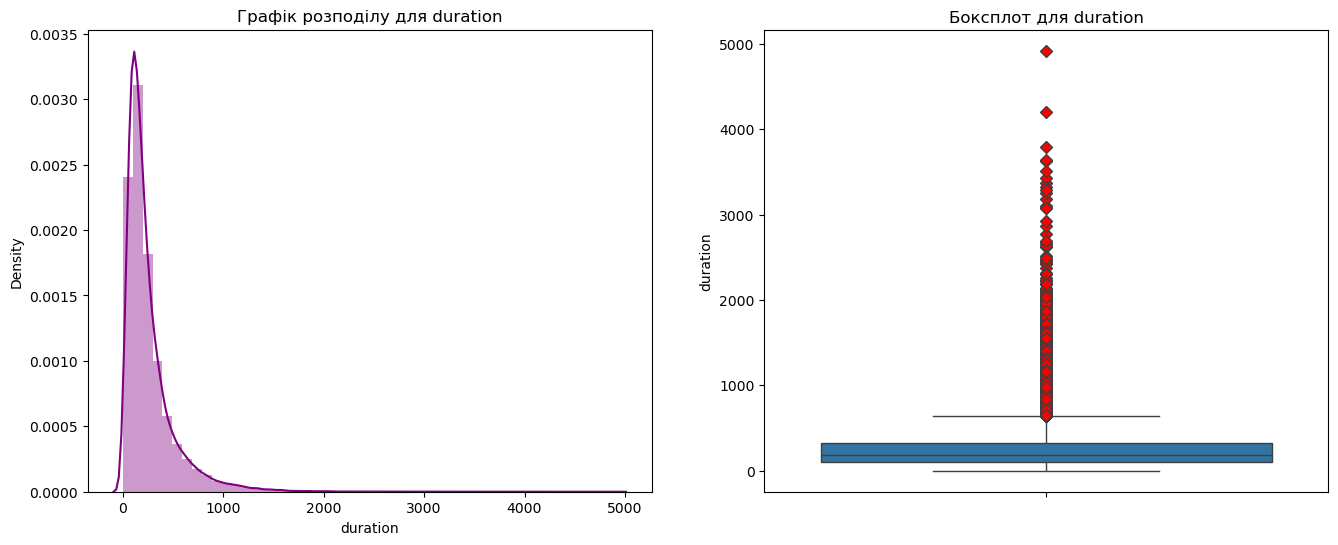

In [24]:
plt.figure(figsize=(20, 10))
vp.dist_box(data,'duration')

Максимальне значення, після якого існують викиди для duration: 555.0
Максимальне значення, після якого існують викиди для duration: 1473.625


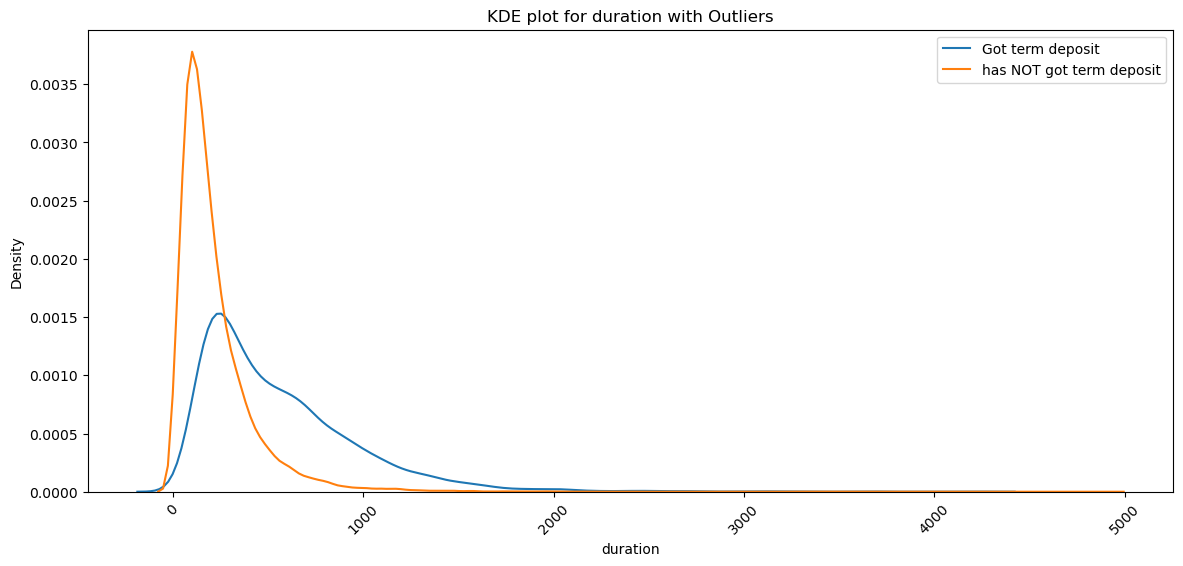

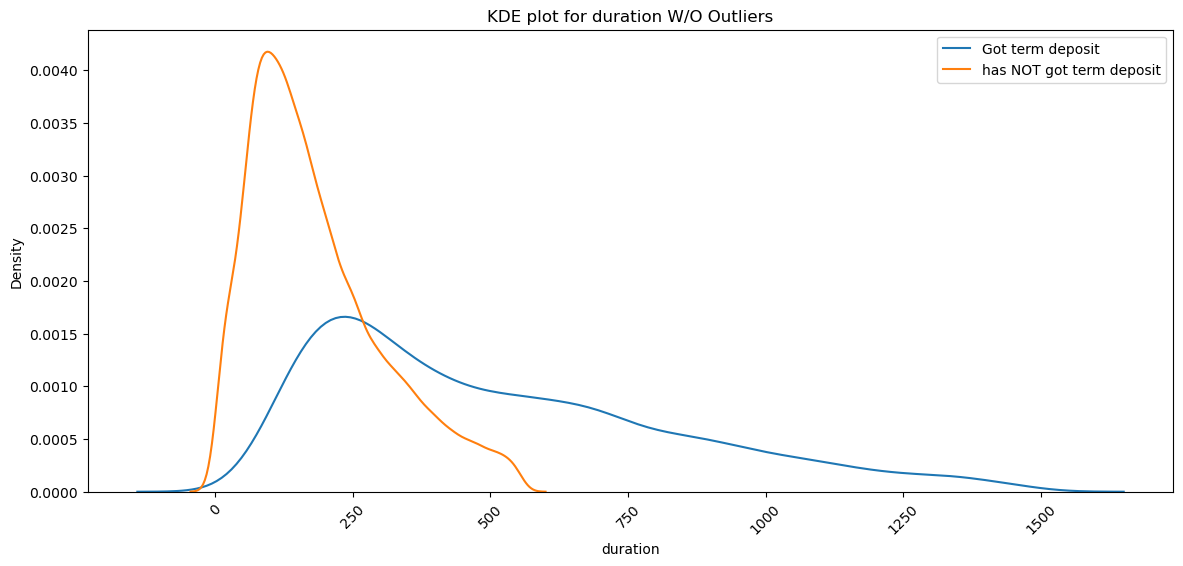

In [25]:
max_duration_v0, max_duration_v1 = vp.outlier_analisys(data0, data1, 'duration')

In [26]:
data['target'].value_counts(), data[data['duration'] == 0].target.value_counts()

(target
 0    36548
 1     4640
 Name: count, dtype: int64,
 target
 0    4
 Name: count, dtype: int64)

In [27]:
data.groupby('y')[data.select_dtypes(exclude='object').columns].agg(['mean','min','max'])

age         duration           campaign          pdays           \
     mean min max     mean min   max     mean min max   mean min  max   
y                                                                       
no  39.91  17  95   220.84   0  4918     2.63   1  56 984.11   0  999   
yes 40.91  17  98   553.19  37  4199     2.05   1  23 792.04   0  999   

    previous         emp.var.rate            cons.price.idx              \
        mean min max         mean   min  max           mean   min   max   
y                                                                         
no      0.13   0   7         0.25 -3.40 1.40          93.60 92.20 94.77   
yes     0.49   0   6        -1.23 -3.40 1.40          93.35 92.20 94.77   

    cons.conf.idx               euribor3m           nr.employed          \
             mean    min    max      mean  min  max        mean     min   
y                                                                         
no         -40.59 -50.80 -26.90      3.81 0.63 5.04     5176.17 4963.60   
yes        -39.79 -50.80 -26.90      2.12 0.63 5.04     5095.12 4963.60   

            target          
        max   mean min max  
y                           
no  5228.10   0.00   0   0  
yes 5228.10   1.00   1   1

In [28]:
origin_shape = data.shape[0]

In [29]:
campaign9999 = data['campaign'].quantile(0.9999)
cont = data[data['campaign'] > percentile_0999]


duration9999 = data.duration.quantile(0.999)
cont = data[data['duration'] > percentile_0999]


data_clear = data[(data['campaign'] <= campaign9999) & (data['duration'] <= duration9999)]
clear_shape = data_clear.shape[0]

In [30]:
print(f'Number of records removed: {origin_shape - clear_shape}, data reduces by {((origin_shape - clear_shape) / origin_shape) * 100:.2f}%')

Number of records removed: 47, data reduces by 0.11%


In [31]:
data_clear.describe()

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,target
count,41141.00,41141.00,41141.00,41141.00,41141.00,41141.00,41141.00,41141.00,41141.00,41141.00,41141.00
mean,40.03,255.67,2.56,962.46,0.17,0.08,93.58,-40.50,3.62,5167.03,0.11
std,10.42,245.23,2.73,186.95,0.50,1.57,0.58,4.63,1.73,72.26,0.32
min,17.00,0.00,1.00,0.00,0.00,-3.40,92.20,-50.80,0.63,4963.60,0.00
25%,32.00,102.00,1.00,999.00,0.00,-1.80,93.08,-42.70,1.34,5099.10,0.00
50%,38.00,179.00,2.00,999.00,0.00,1.10,93.75,-41.80,4.86,5191.00,0.00
75%,47.00,319.00,3.00,999.00,0.00,1.40,93.99,-36.40,4.96,5228.10,0.00
max,98.00,2139.00,41.00,999.00,7.00,1.40,94.77,-26.90,5.04,5228.10,1.00


In [32]:
# plt.figure(figsize=(20, 10))
# vp.dist_box(data_clear,'campaign')

# Categorical data

In [33]:
data[cat_cols]

,job,marital,education,default,housing,loan,contact,month,day_of_week,poutcome,y
0,housemaid,married,basic.4y,no,no,no,telephone,may,mon,nonexistent,no
1,services,married,high.school,unknown,no,no,telephone,may,mon,nonexistent,no
2,services,married,high.school,no,yes,no,telephone,may,mon,nonexistent,no
3,admin.,married,basic.6y,no,no,no,telephone,may,mon,nonexistent,no
4,services,married,high.school,no,no,yes,telephone,may,mon,nonexistent,no
...,...,...,...,...,...,...,...,...,...,...,...
41183,retired,married,professional.course,no,yes,no,cellular,nov,fri,nonexistent,yes
41184,blue-collar,married,professional.course,no,no,no,cellular,nov,fri,nonexistent,no
41185,retired,married,university.degree,no,yes,no,cellular,nov,fri,nonexistent,no
41186,technician,married,professional.course,no,no,no,cellular,nov,fri,nonexistent,yes


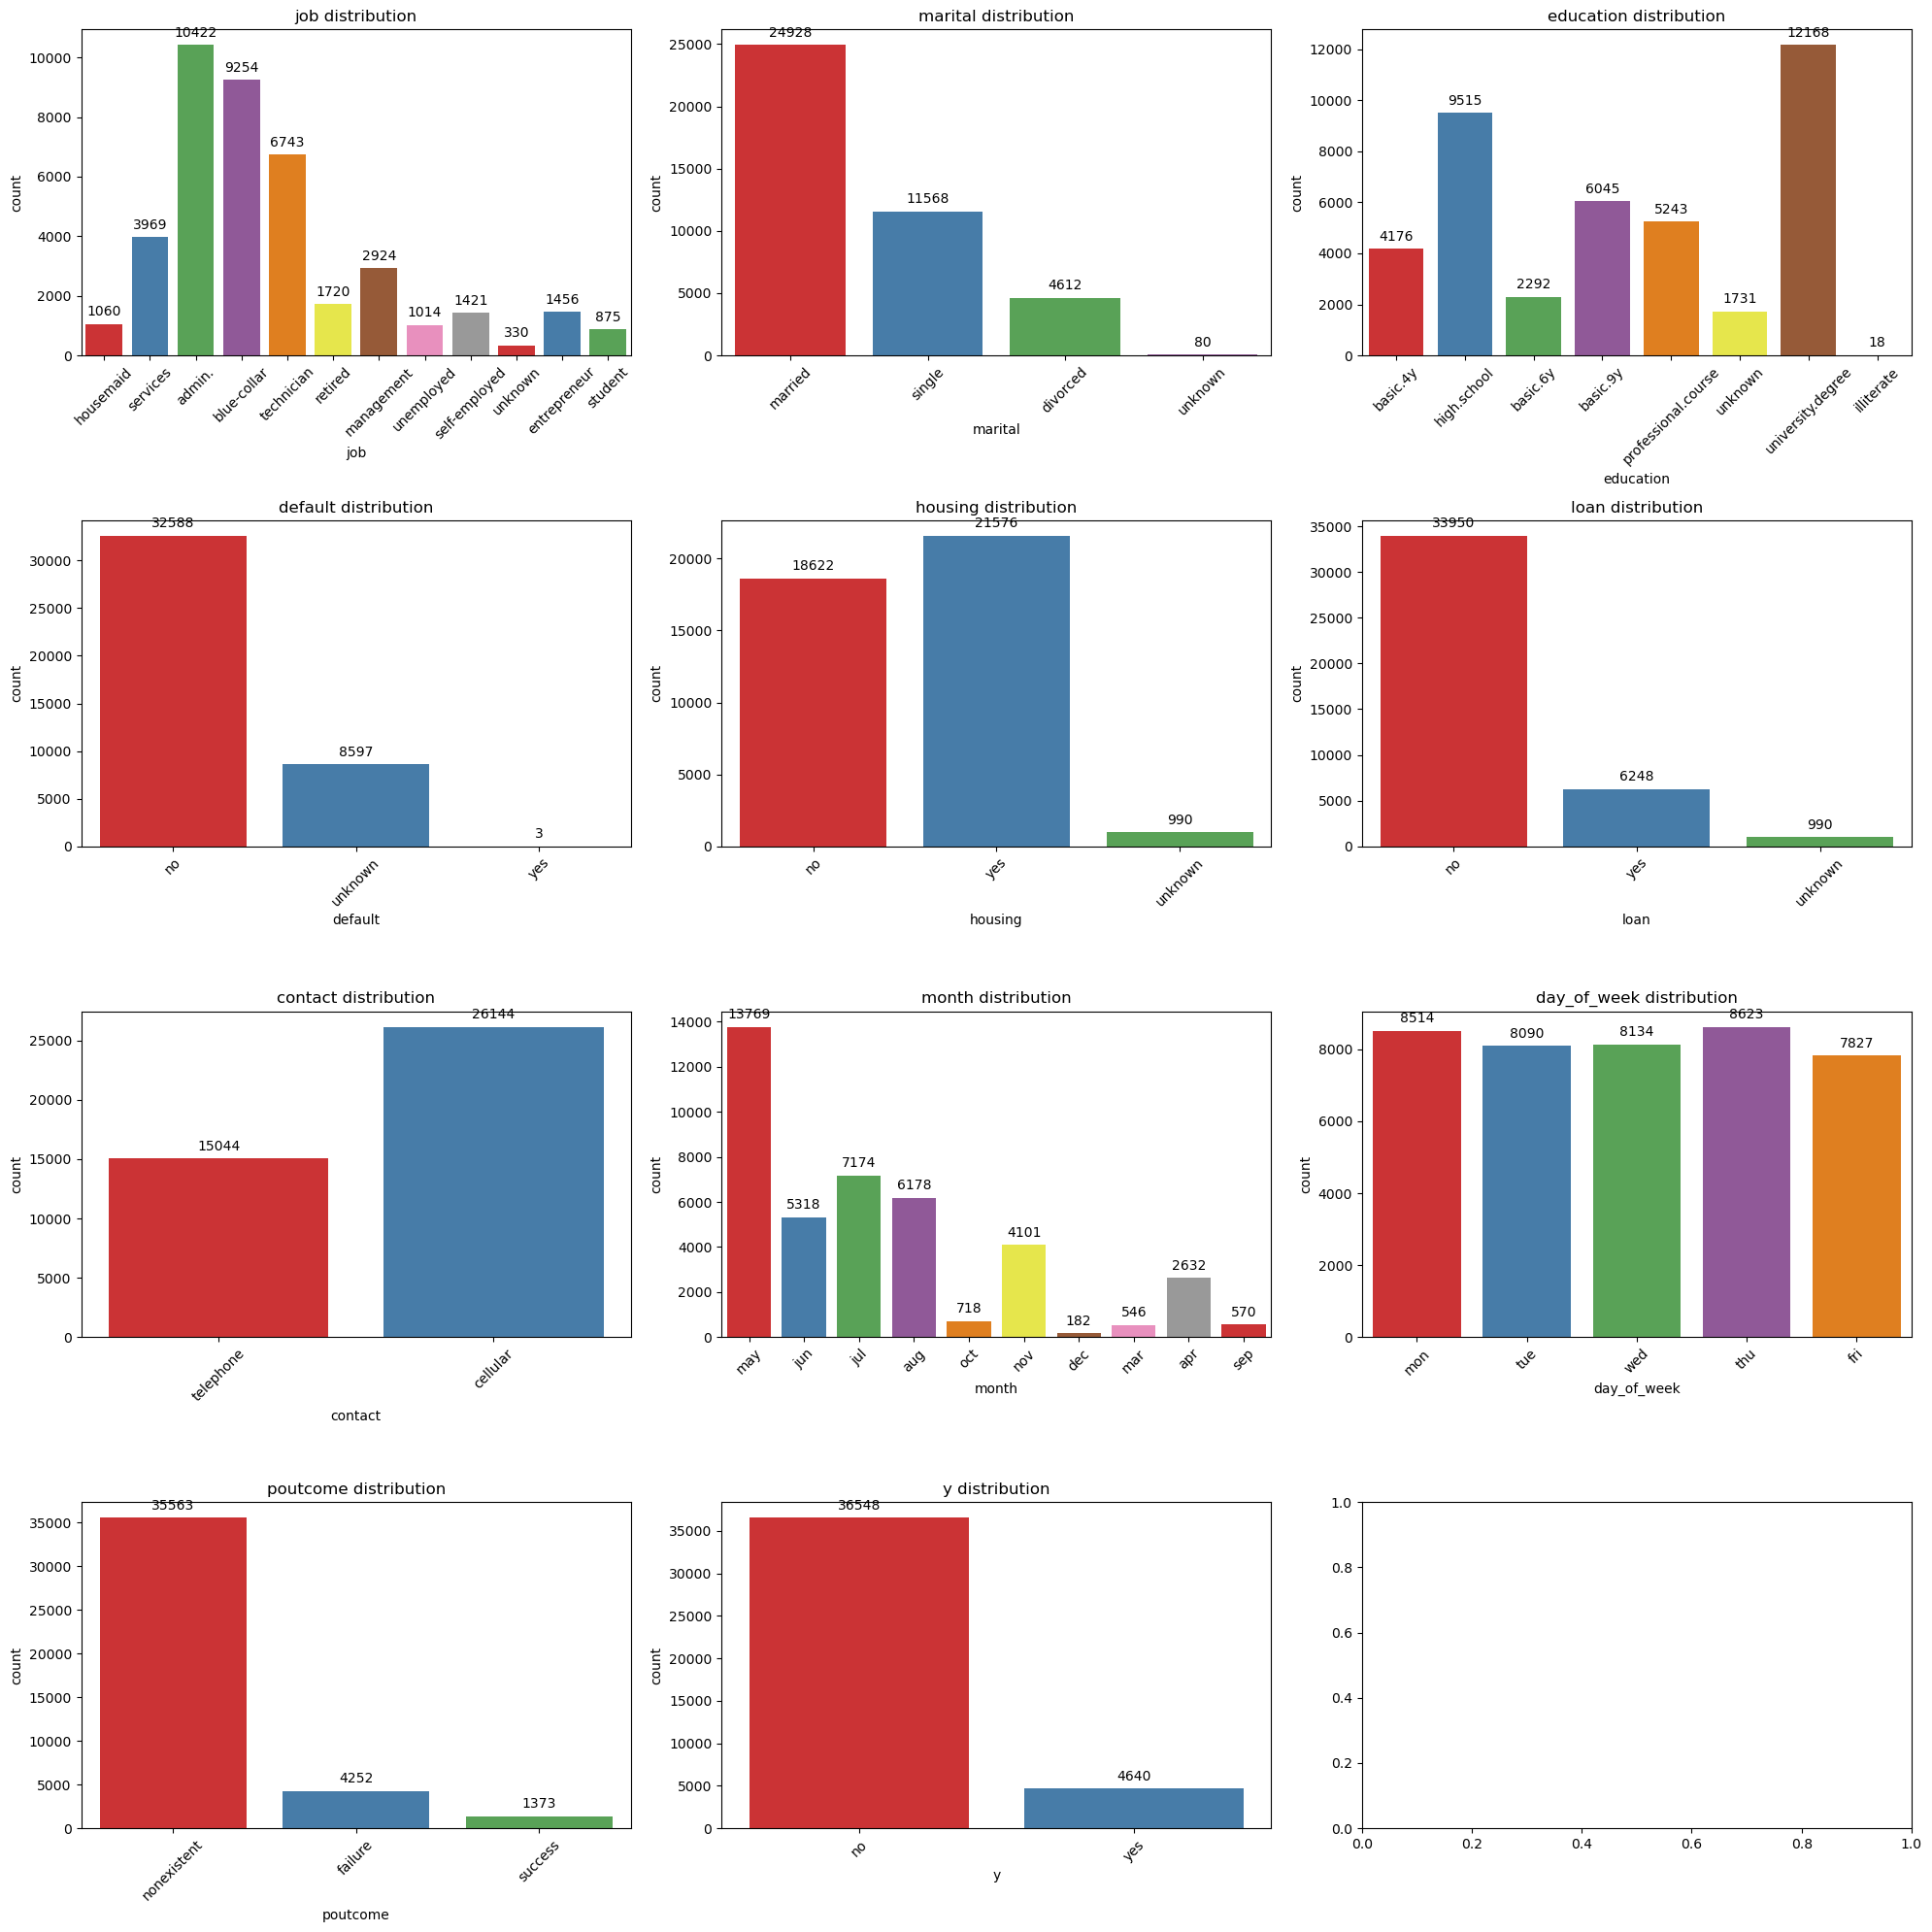

In [51]:
fig, ax = plt.subplots(4, 3, figsize=(20, 20))
for i, col in enumerate(cat_cols):
    plot = sns.countplot(data=data, x=col, hue=col, palette='Set1', ax=ax[i//3, i%3], legend=False)
    ax[i//3, i%3].set_title(f'{col} distribution')
    ax[i//3, i%3].tick_params(axis='x', rotation=45)
    for p in plot.patches:
        plot.annotate(format(p.get_height(), '.0f'), 
                      (p.get_x() + p.get_width() / 2., p.get_height()), 
                      ha = 'center', va = 'center', 
                      xytext = (0, 9), 
                      textcoords = 'offset points')

plt.tight_layout()
plt.show()

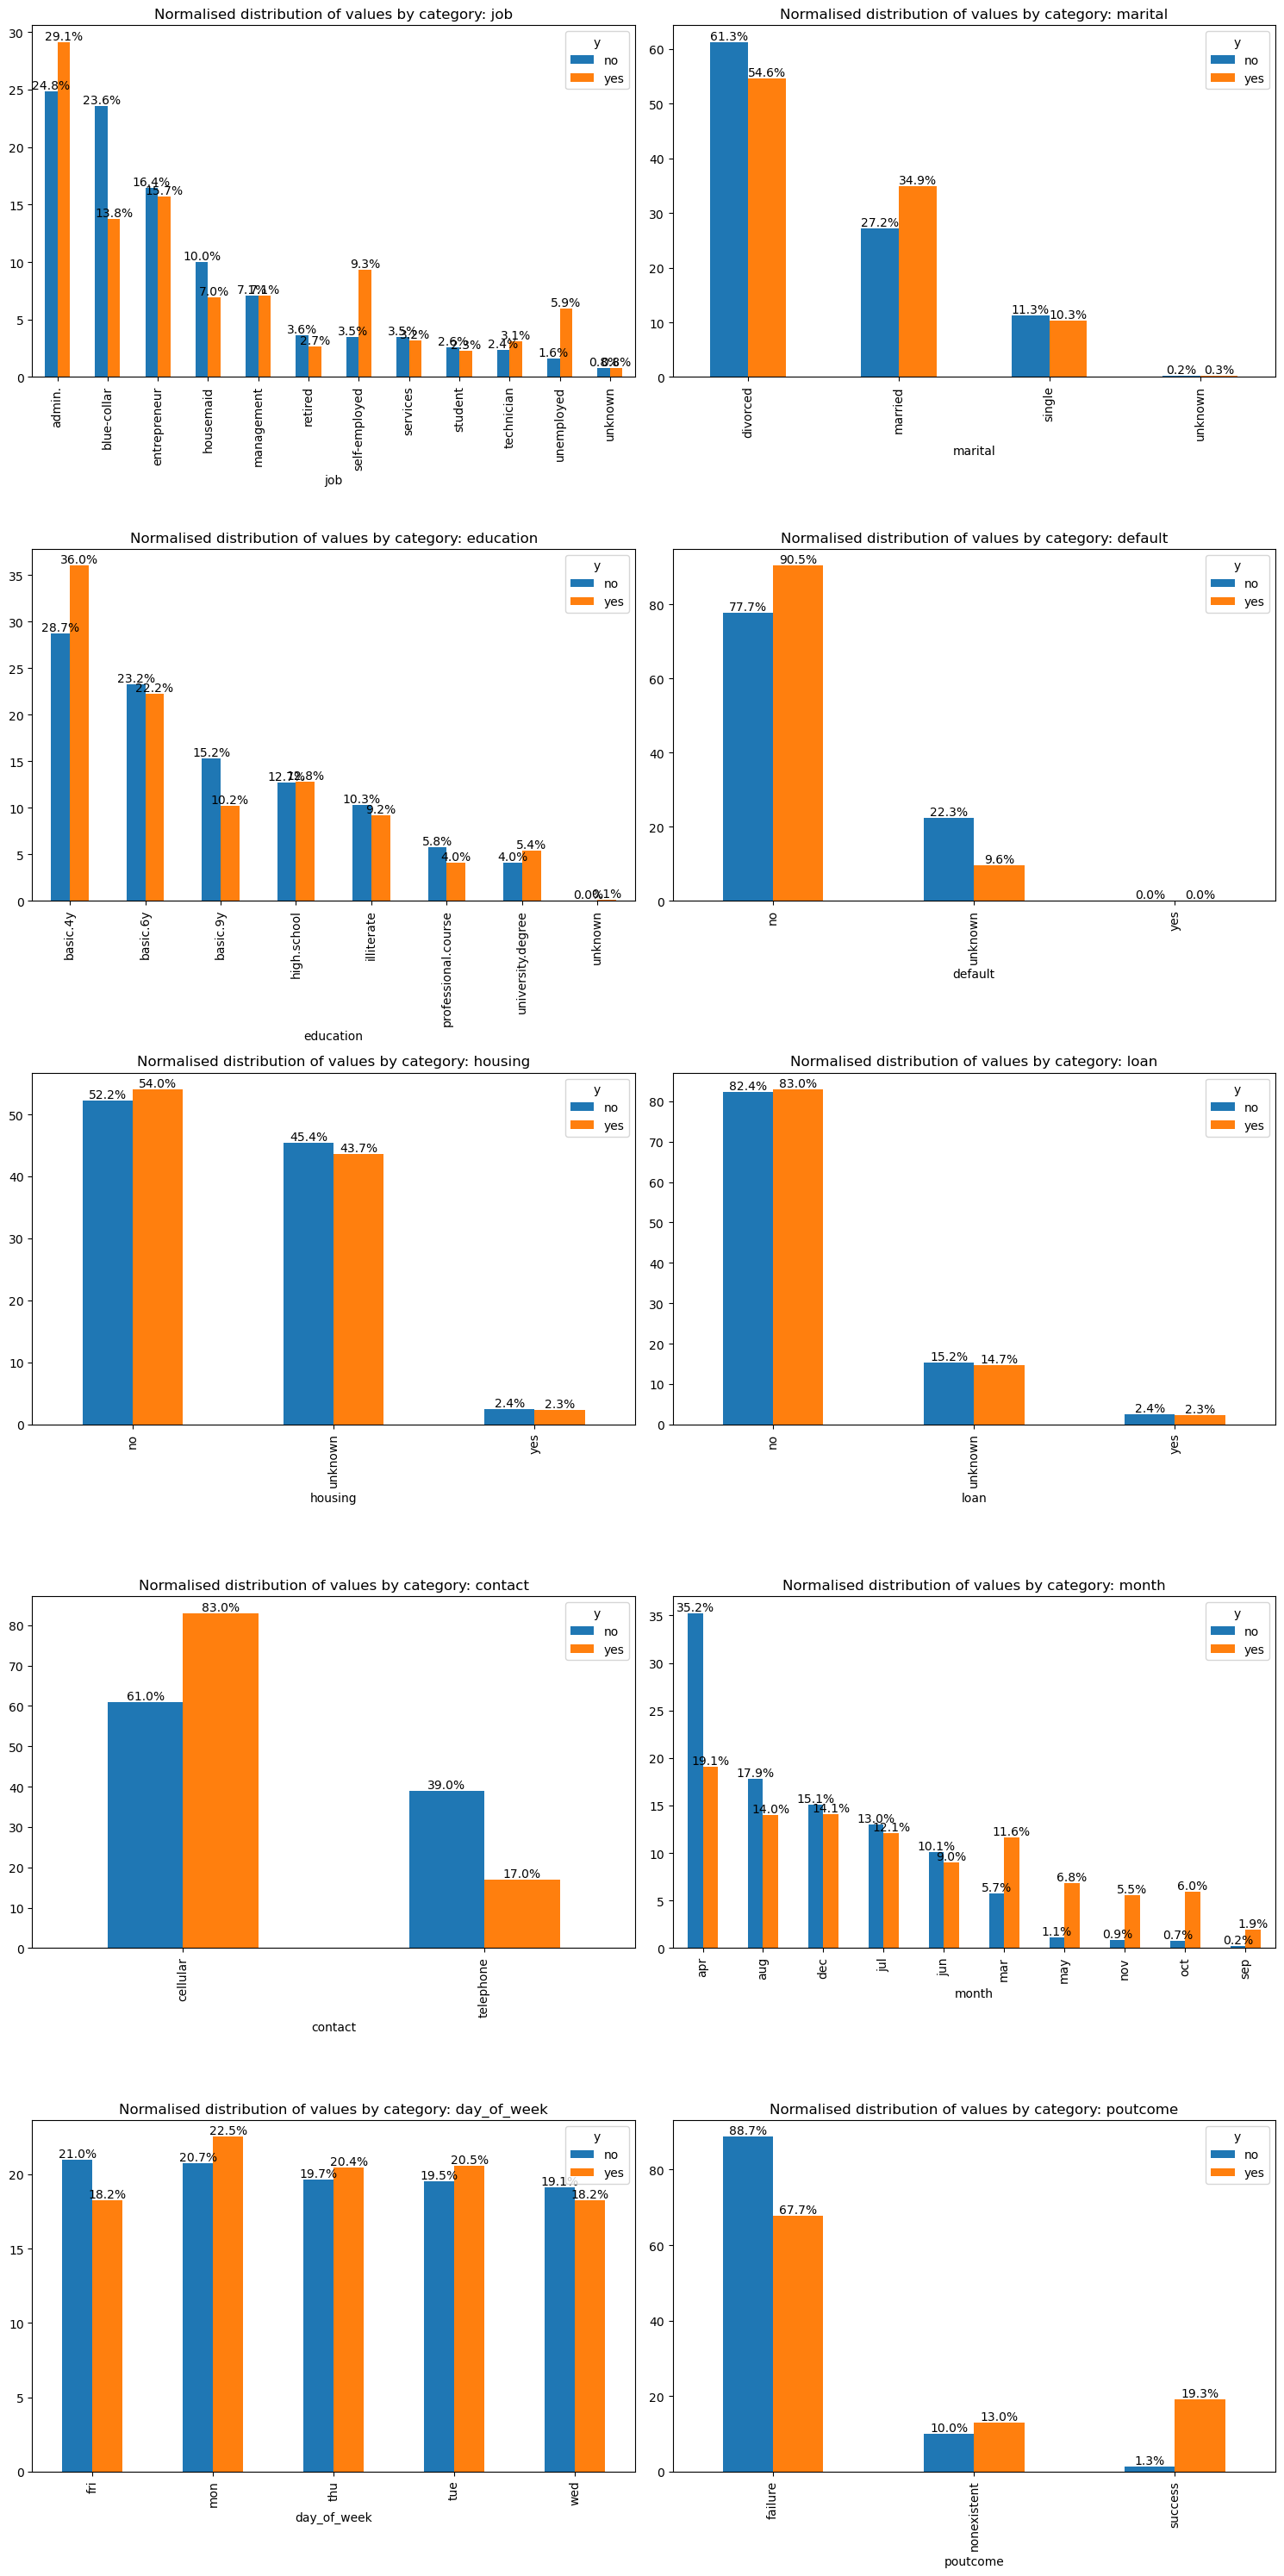

In [60]:
vp.create_subplots(data, cat_cols)

In [58]:
# vp.uni_cat_target_compare(data, 'education')
# vp.uni_cat_target_compare(data, 'job')
# vp.uni_cat_target_compare(data, 'marital')
# vp.uni_cat_target_compare(data, 'housing')
# vp.uni_cat_target_compare(data, 'loan')
# vp.uni_cat_target_compare(data, 'contact')
# vp.uni_cat_target_compare(data, 'month')
# vp.uni_cat_target_compare(data, 'day_of_week')
# vp.uni_cat_target_compare(data, 'poutcome')
# vp.uni_cat_target_compare(data, 'default')

In [37]:
data_clear1 = data_clear[data_clear['target'] == 1]  
data_clear0 = data_clear[data_clear['target'] == 0]

THE CLIENT HAS TAKEN OUT A TERM DEPOSIT


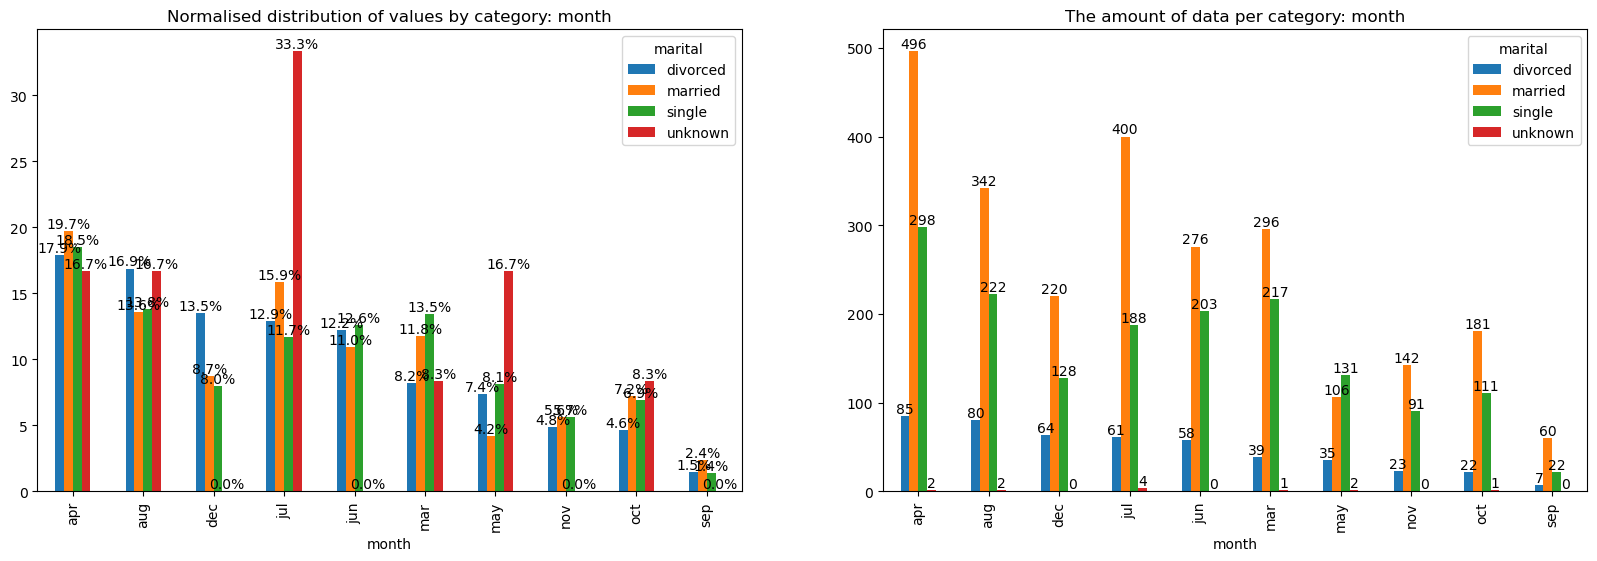

THE CLIENT HAS NOT TAKEN OUT A TERM DEPOSIT


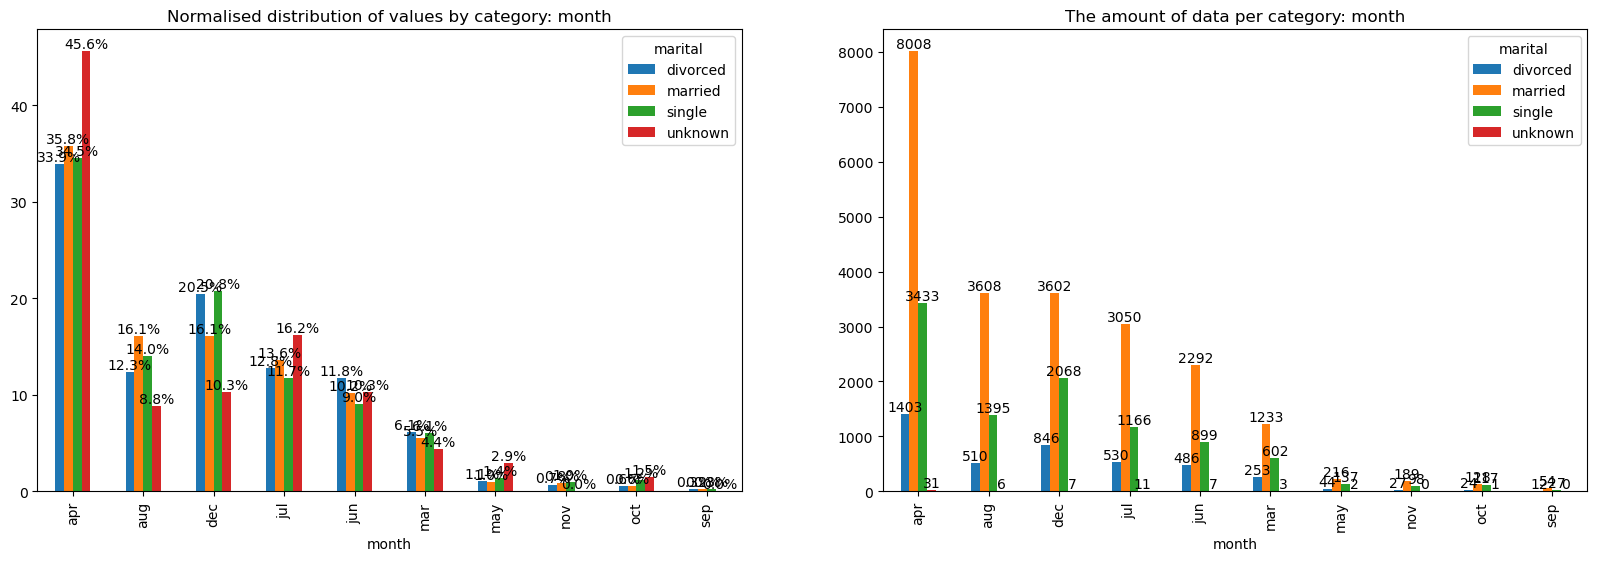

In [38]:
vp.bi_countplot_target(data_clear0, data_clear1, 'month', 'marital')

In [39]:
data_clear['target'].value_counts(), data_clear['target'].value_counts(normalize=True)

(target
 0    36525
 1     4616
 Name: count, dtype: int64,
 target
 0   0.89
 1   0.11
 Name: proportion, dtype: float64)

In [40]:
dummies_data = pd.get_dummies(data,columns=data.select_dtypes(include='object').columns[:-1],drop_first=True,dtype=int)
dummies_data['y'] = dummies_data['y'].apply(lambda x : 0 if x=='no' else 1)
correlation_with_y = dummies_data.corr()['y'].sort_values()[:-1]
correlation_with_y

nr.employed                     -0.35
pdays                           -0.32
euribor3m                       -0.31
emp.var.rate                    -0.30
poutcome_nonexistent            -0.19
contact_telephone               -0.14
cons.price.idx                  -0.14
month_may                       -0.11
default_unknown                 -0.10
job_blue-collar                 -0.07
campaign                        -0.07
education_basic.9y              -0.05
marital_married                 -0.04
job_services                    -0.03
month_jul                       -0.03
education_basic.6y              -0.02
day_of_week_mon                 -0.02
job_entrepreneur                -0.02
month_nov                       -0.01
month_jun                       -0.01
month_aug                       -0.01
education_high.school           -0.01
job_housemaid                   -0.01
job_technician                  -0.01
job_self-employed               -0.00
loan_yes                        -0.00
default_yes 

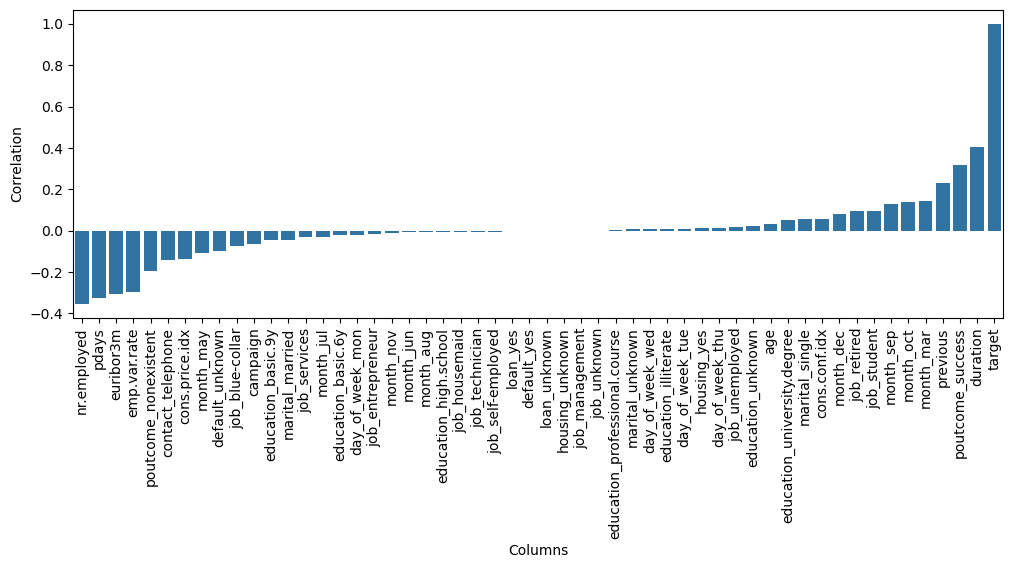

In [41]:
plt.figure(figsize=(12,4),dpi=100)
sns.barplot(x=correlation_with_y.index , y=correlation_with_y)
plt.xticks(rotation=90)
plt.xlabel('Columns')
plt.ylabel('Correlation');

In [47]:
print(f"Duplicate values count: {data_clear.duplicated().sum()}")
data_clear.loc[data_clear.duplicated(keep=False)].head(8)

Duplicate values count: 12


,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y,target
1265,39,blue-collar,married,basic.6y,no,no,no,telephone,may,thu,124,1,999,0,nonexistent,1.10,93.99,-36.40,4.86,5191.00,no,0
1266,39,blue-collar,married,basic.6y,no,no,no,telephone,may,thu,124,1,999,0,nonexistent,1.10,93.99,-36.40,4.86,5191.00,no,0
12260,36,retired,married,unknown,no,no,no,telephone,jul,thu,88,1,999,0,nonexistent,1.40,93.92,-42.70,4.97,5228.10,no,0
12261,36,retired,married,unknown,no,no,no,telephone,jul,thu,88,1,999,0,nonexistent,1.40,93.92,-42.70,4.97,5228.10,no,0
14155,27,technician,single,professional.course,no,no,no,cellular,jul,mon,331,2,999,0,nonexistent,1.40,93.92,-42.70,4.96,5228.10,no,0
14234,27,technician,single,professional.course,no,no,no,cellular,jul,mon,331,2,999,0,nonexistent,1.40,93.92,-42.70,4.96,5228.10,no,0
16819,47,technician,divorced,high.school,no,yes,no,cellular,jul,thu,43,3,999,0,nonexistent,1.40,93.92,-42.70,4.96,5228.10,no,0
16956,47,technician,divorced,high.school,no,yes,no,cellular,jul,thu,43,3,999,0,nonexistent,1.40,93.92,-42.70,4.96,5228.10,no,0


In [ ]:
df = data_clear.drop_duplicates()